# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

# Input-Output Operations

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

## Basic I/O with Python

### Writing Objects to Disk

In [2]:
path = './'  # choose a path to your liking

In [3]:
import numpy as np
from random import gauss

In [4]:
a = [gauss(1.5, 2) for i in range(1000000)]
  # generation of normally distributed randoms

In [5]:
import pickle

In [6]:
pkl_file = open(path + 'data.pkl', 'wb')
  # open file for writing
  # Note: existing file might be overwritten

In [7]:
%time pickle.dump(a, pkl_file)

Wall time: 37.3 ms


In [8]:
pkl_file = open(path + 'data.pkl', 'rb')  # open file for reading

In [9]:
%time b = pickle.load(pkl_file)

Wall time: 73.8 ms


In [10]:
b[:5]

[1.5785666670680916,
 3.531193731132899,
 1.5900457655781652,
 1.7063097055234486,
 2.6902255487792077]

In [11]:
a[:5]

[1.5785666670680916,
 3.531193731132899,
 1.5900457655781652,
 1.7063097055234486,
 2.6902255487792077]

In [20]:
pkl_file.close()

### Reading and Writing Text Files

In [12]:
import pandas as pd

In [13]:
csv_file = open(path + 'data.csv', 'w')  # open file for writing

In [14]:
rows = 5000
a = np.random.standard_normal((rows, 5))  # dummy data
a.round(4)
t = pd.date_range(start='2014/1/1', periods=rows, freq='H')
    # set of hourly datetime objects

In [15]:
header = 'date,no1,no2,no3,no4,no5\n'
csv_file.write(header)

25

In [16]:
for t_, (no1, no2, no3, no4, no5) in zip(t, a):
    s = '%s,%f,%f,%f,%f,%f\n' % (t_, no1, no2, no3, no4, no5)
    csv_file.write(s)
csv_file.close()

In [17]:
csv_file = open(path + 'data.csv', 'r')  # open file for reading

In [18]:
for i in range(5):
    print(csv_file.readline(), end='')

date,no1,no2,no3,no4,no5
2014-01-01 00:00:00,-0.542526,1.102962,-0.037707,0.658970,0.074015
2014-01-01 01:00:00,1.264231,2.219641,0.569845,-1.139794,1.178789
2014-01-01 02:00:00,0.013882,-0.147828,0.495108,0.011525,-1.376031
2014-01-01 03:00:00,1.512740,0.460691,-0.003721,-0.262860,0.699548


In [19]:
csv_file = open(path + 'data.csv', 'r')
content = csv_file.readlines()
for line in content[:5]:
    print(line, end='')

date,no1,no2,no3,no4,no5
2014-01-01 00:00:00,-0.542526,1.102962,-0.037707,0.658970,0.074015
2014-01-01 01:00:00,1.264231,2.219641,0.569845,-1.139794,1.178789
2014-01-01 02:00:00,0.013882,-0.147828,0.495108,0.011525,-1.376031
2014-01-01 03:00:00,1.512740,0.460691,-0.003721,-0.262860,0.699548


In [20]:
csv_file.close()

### SQL Databases

In [21]:
import sqlite3 as sq3

In [22]:
con = sq3.connect(path + 'numbs.db')

In [23]:
query = 'DROP TABLE IF EXISTS numbs'

In [24]:
con.execute(query)

In [25]:
query = 'CREATE TABLE numbs (Date date, No1 real, No2 real)'

In [26]:
con.execute(query)

In [27]:
con.commit()

In [28]:
import datetime as dt

In [29]:
con.execute('INSERT INTO numbs VALUES(?, ?, ?)',
            (dt.datetime.now(), 0.12, 7.3))

In [30]:
data = np.random.standard_normal((10000, 2)).round(5)

In [31]:
for row in data:
    con.execute('INSERT INTO numbs VALUES(?, ?, ?)',
                (dt.datetime.now(), row[0], row[1]))
con.commit()

In [32]:
con.execute('SELECT * FROM numbs').fetchmany(10)

[('2020-11-05 20:41:07.567335', 0.12, 7.3),
 ('2020-11-05 20:41:07.587283', -0.97229, -0.3001),
 ('2020-11-05 20:41:07.587283', 0.34457, -1.49155),
 ('2020-11-05 20:41:07.587283', 1.91545, -2.40294),
 ('2020-11-05 20:41:07.588281', -1.13393, 0.07509),
 ('2020-11-05 20:41:07.588281', 0.23924, 2.54253),
 ('2020-11-05 20:41:07.588281', -0.78964, 1.11873),
 ('2020-11-05 20:41:07.588281', 2.04089, 1.32771),
 ('2020-11-05 20:41:07.588281', 1.88792, -0.11509),
 ('2020-11-05 20:41:07.588281', -1.07479, -0.40285)]

In [33]:
pointer = con.execute('SELECT * FROM numbs')

In [34]:
for i in range(3):
    print(pointer.fetchone())

('2020-11-05 20:41:07.567335', 0.12, 7.3)
('2020-11-05 20:41:07.587283', -0.97229, -0.3001)
('2020-11-05 20:41:07.587283', 0.34457, -1.49155)


In [35]:
con.close()

### Writing and Reading Numpy Arrays

In [36]:
import numpy as np

In [37]:
dtimes = np.arange('2015-01-01 10:00:00', '2021-12-31 22:00:00',
                  dtype='datetime64[m]')  # minute intervals

In [38]:
dty = np.dtype([('Date', 'datetime64[m]'), ('No1', 'f'), ('No2', 'f')])
data = np.zeros(len(dtimes), dtype=dty)

In [39]:
data['Date'] = dtimes

In [40]:
a = np.random.standard_normal((len(dtimes), 2)).round(5)
data['No1'] = a[:, 0]
data['No2'] = a[:, 1]

In [41]:
%time np.save(path + 'array', data)  # suffix .npy is added

Wall time: 558 ms


In [42]:
%time np.load(path + 'array.npy')

Wall time: 42.1 ms


array([('2015-01-01T10:00', -1.9368 ,  0.68029),
       ('2015-01-01T10:01', -0.13516, -1.06093),
       ('2015-01-01T10:02',  0.83338,  0.37493), ...,
       ('2021-12-31T21:57', -1.29863, -0.29996),
       ('2021-12-31T21:58', -1.00085, -0.5516 ),
       ('2021-12-31T21:59', -0.33314,  0.457  )],
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [43]:
data = np.random.standard_normal((10000, 6000))

In [44]:
%time np.save(path + 'array', data) 

Wall time: 6.36 s


In [45]:
%time np.load(path + 'array.npy')

Wall time: 200 ms


array([[-1.08510493,  1.45211471,  0.01462326, ...,  1.89375836,
        -0.34216449, -0.83635286],
       [-0.65745155, -0.75112106, -1.16718321, ..., -0.11640172,
        -0.2402385 , -1.38494231],
       [-1.0837809 , -0.06743309,  0.31106012, ..., -1.67409509,
        -0.76748745,  0.47420947],
       ...,
       [ 0.25481604, -1.82437436,  0.23027382, ...,  1.65545639,
         0.51591961, -0.06884388],
       [ 0.8339817 , -0.74413079, -0.16830202, ...,  1.14708144,
         0.15703534, -0.40908465],
       [ 0.32227827,  0.44683639, -1.21680612, ...,  0.35445027,
        -0.0295841 ,  0.47348599]])

In [46]:
data = 0.0

## I/O with pandas

In [47]:
import numpy as np
import pandas as pd
data = np.random.standard_normal((1000000, 5)).round(5)
        # sample data set

In [48]:
filename = path + 'numbs'

### SQL Database

In [49]:
import sqlite3 as sq3

In [50]:
con = sq3.Connection(filename + '.db')

In [51]:
query = 'DROP TABLE IF EXISTS numbers'

In [52]:
con.execute(query)

In [53]:
query = 'CREATE TABLE numbers (No1 real, No2 real,\
        No3 real, No4 real, No5 real)'

In [54]:
con.execute(query)

In [55]:
%%time
con.executemany('INSERT INTO numbers VALUES (?, ?, ?, ?, ?)', data)
con.commit()

Wall time: 7.51 s


In [56]:
%%time
temp = con.execute('SELECT * FROM numbers').fetchall()
print(temp[:2])
temp = 0.0

[(-0.15612, -1.28493, -0.67311, -1.49671, 0.33878), (0.0812, -1.04084, 0.29618, 0.49273, 1.68904)]
Wall time: 1.77 s


In [57]:
%%time
query = 'SELECT * FROM numbers WHERE No1 > 0 AND No2 < 0'
res = np.array(con.execute(query).fetchall()).round(3)

Wall time: 751 ms


(-4.5, 0.5)

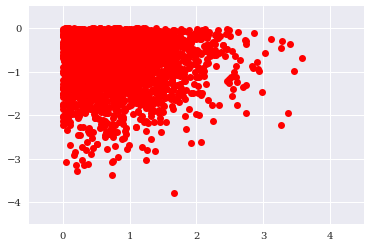

In [58]:
res = res[::100]  # every 100th result
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(res[:, 0], res[:, 1], 'ro')
plt.grid(True); plt.xlim(-0.5, 4.5); plt.ylim(-4.5, 0.5)
# tag: scatter_query
# title: Plot of the query result
# size: 60

### From SQL to pandas

In [59]:
%time data = pd.read_sql('SELECT * FROM numbers', con)

Wall time: 2.33 s


In [60]:
data.head()

,No1,No2,No3,No4,No5
0,-0.15612,-1.28493,-0.67311,-1.49671,0.33878
1,0.08120,-1.04084,0.29618,0.49273,1.68904
2,0.39180,0.41626,1.64582,-0.42707,-0.01040
3,-0.59201,-1.19119,-0.08627,0.02917,0.09257
4,-0.62456,0.80961,-0.33987,0.61080,-1.62827


In [61]:
%time data[(data['No1'] > 0) & (data['No2'] < 0)].head()

Wall time: 28.9 ms


,No1,No2,No3,No4,No5
1,0.08120,-1.04084,0.29618,0.49273,1.68904
6,0.30913,-0.51221,0.06528,0.55099,0.62399
8,0.22270,-0.26429,-0.45541,0.26340,-1.00707
10,1.15672,-0.80877,-0.25081,0.29928,0.29724
11,0.32179,-0.17496,0.50744,0.14837,2.14740


In [62]:
%%time
res = data[['No1', 'No2']][((data['No1'] > 0.5) | (data['No1'] < -0.5))
                     & ((data['No2'] < -1) | (data['No2'] > 1))]

Wall time: 31.9 ms


(-5.536513, 5.128273, -5.6151605, 5.0823504999999995)

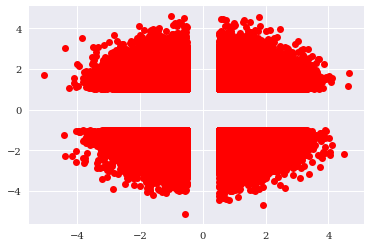

In [63]:
plt.plot(res.No1, res.No2, 'ro')
plt.grid(True); plt.axis('tight')
# tag: data_scatter_1
# title: Scatter plot of complex query results
# size: 55

### Data as CSV File

In [64]:
%time data.to_csv(filename + '.csv')

Wall time: 5.88 s


Wall time: 739 ms


array([[<AxesSubplot:title={'center':'No1'}>,
        <AxesSubplot:title={'center':'No2'}>],
       [<AxesSubplot:title={'center':'No3'}>,
        <AxesSubplot:title={'center':'No4'}>]], dtype=object)

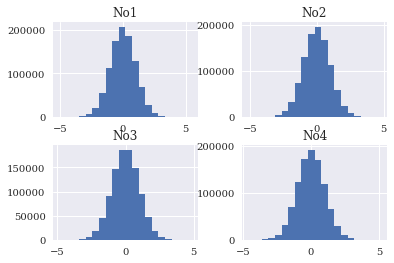

In [65]:
%%time
pd.read_csv(filename + '.csv')[['No1', 'No2',
                                'No3', 'No4']].hist(bins=20);
# tag: data_hist_3
# title: Histogram of 4 data set

### Data as Excel File

In [66]:
%time data[:100000].to_excel(filename + '.xlsx')

Wall time: 18.5 s


Wall time: 6.49 s


<AxesSubplot:>

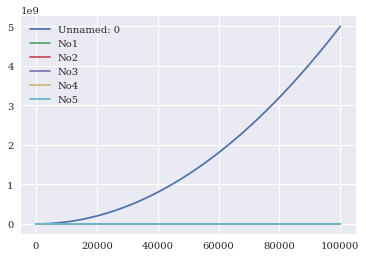

In [67]:
%time pd.read_excel(filename + '.xlsx', 'Sheet1').cumsum().plot()
# tag: data_paths
# title: Paths of random data from Excel file
# size: 60